In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [5]:
# Load the dataset
df=pd.read_csv('E:\Price_Predictorrr-main\Price_Predictorrr-main\laptop.csv')
df

,Description,Days,Price,AvailableOn,Rating,Comment
0,NVIDIA GeForce GTX 1650,1,54171,Flipkart,5,Here is my review on this laptop after using f...
1,15.6 inch Full HD Acer ComfyView LED Backlit T...,2,48303,Flipkart,3,"So basically, laptop is well and good. But the..."
2,Light Laptop without Optical Disk Drive,3,48852,Flipkart,5,"Good Product, I am satisfied all of the featur..."
3,Pre-installed Genuine Windows 10 OS,4,52352,Flipkart,4,Posting this review after 8 days of usePros: V...
4,NaN,5,50075,Amazon,5,Performance is good as I expect in this price ...
...,...,...,...,...,...,...
295,NaN,361,50056,Flipkart,4,I got it today and performance wise this is th...
296,NaN,362,50187,Flipkart,5,excellent performance in gaming
297,NaN,363,53544,Flipkart,5,Go for it.if you are searching for a budget fr...
298,NaN,364,52475,Amazon,4,I got it today and performance wise this is th...


In [6]:
# Prepare the data
X = df['Days'].values.reshape(-1, 1)
y = df['Price'].values.reshape(-1, 1)
description = df['Description']
rating = df['Rating']
comment = df['Comment']
available_on = df['AvailableOn']

In [7]:
# Create the linear regression model
model = LinearRegression()

In [8]:
# Fit the model to the data
model.fit(X, y)

LinearRegression()

In [9]:
# Predict the prices for the given days
predicted_prices = model.predict(X)

In [10]:
# Find the best price and corresponding day
best_price_index = y.argmin()
best_day = X[best_price_index][0]
best_price = y[best_price_index][0]
best_description = description[best_price_index]
best_available_on = available_on[best_price_index]

# Check if the description is NaN, if so, fallback to the first line description
if pd.isnull(best_description):
    best_description = description.iloc[0]

best_review = comment[best_price_index]
best_rating = rating[best_price_index]

print("Best price: {} on day {}".format(best_price, best_day))
print("Description: ", best_description)
print("Review: ", best_review)
print("Rating: ", best_rating)
print("Available On: ", best_available_on)

Best price: 48001 on day 214
Description:  NVIDIA GeForce GTX 1650
Review:  Battery performance is very low
Rating:  1
Available On:  Flipkart


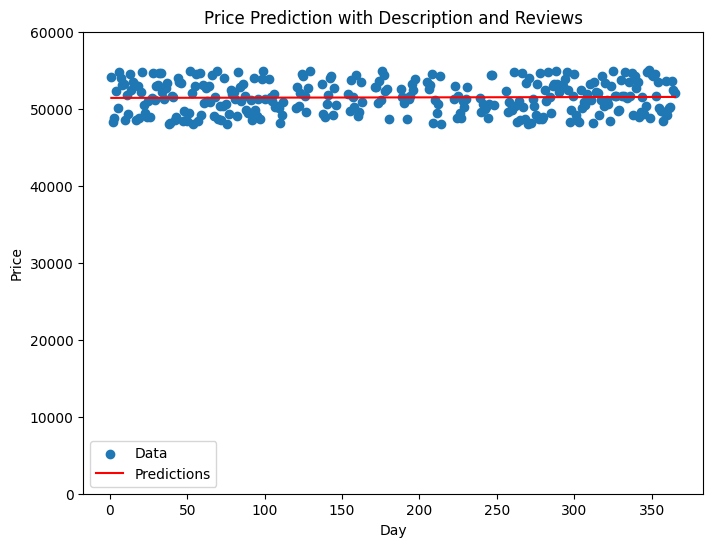

[[51490.71585535]]


In [11]:
# Plot the data and the predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Data')
plt.plot(X, predicted_prices, color='red', label='Predictions')
plt.ylim(0, 60000)
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.title('Price Prediction with Description and Reviews')
plt.show()

print(model.predict([[250]]))

In [ ]:
import pickle

# Save the trained model
pickle.dump(model, open('laptop.sav', 'wb'))
